In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [54]:
path=r"C:\Users\Jeremy\Desktop"
os.chdir(path)
df = pd.read_csv("NFLData.csv")
df

for col in  df.columns[1:]: #Skipping the first column because it's our team names.
    df[col] = pd.to_numeric(df[col]) # Switching the columns data type from str to int.

df #Viewing our df

,Team,Pass Att,Pass Cmp,Pass Yds/Att,Pass Yds,Pass TD,Pass INT,Pass Rate,Pass 1st%,Pass 20+,...,Rush 1st%.1,Scrm Plys,WIN %,Wins,SIGNED,AVG AGE,ACTIVE,DEAD,TOTAL CAP,CAP SPACE
0,49ers,514,343,8.6,4437,26,14,99.2,38.9,63,...,26.0,1035,0.588,10,55,26.85,138172427,23504522,195101014,662008
1,Bears,542,332,6.7,3635,16,20,75.5,33.2,40,...,25.0,1075,0.353,6,53,27.38,128620134,26298749,188749384,1383458
2,Bengals,555,384,8.7,4806,36,14,106.9,37.5,63,...,22.0,1046,0.588,10,61,26.00,154339838,18929965,191286587,3851688
3,Bills,655,415,6.8,4450,36,16,91.3,36.0,51,...,29.1,1143,0.647,11,55,26.49,165572031,9888567,187735198,641761
4,Broncos,541,354,7.1,3856,20,9,91.7,33.1,46,...,27.0,1036,0.412,7,55,25.78,107269390,37144693,188343846,12465470
5,Browns,520,320,7.0,3619,21,14,84.6,34.0,47,...,28.4,1054,0.471,8,56,25.59,126473899,29003079,202441273,9468418
6,Buccaneers,731,492,7.4,5383,43,12,101.6,37.4,76,...,27.5,1139,0.765,13,57,27.58,149094323,11189876,181119199,931909
7,Cardinals,591,415,7.8,4619,27,11,100.6,36.2,62,...,25.6,1126,0.647,11,56,27.29,153976241,15710653,191127625,913352
8,Chargers,674,443,7.4,5014,38,15,97.4,38.0,53,...,26.5,1128,0.529,9,53,26.51,159785845,6203246,183047646,8682881
9,Chiefs,675,448,7.3,4937,37,13,98.1,39.6,58,...,27.6,1134,0.706,12,54,26.43,160366274,17790771,185112146,3320964


In [55]:
corr_test = df.corr()['Wins'] # Running a corr test to see which variables are most correlated to our total wins.
corr_test # As we can see, the closer the absolute value of the corr test is to 1, the more correlated it is with total wins.

Pass Att        0.268985
Pass Cmp        0.490462
Pass Yds/Att    0.625404
Pass Yds        0.678357
Pass TD         0.752325
Pass INT       -0.436682
Pass Rate       0.761709
Pass 1st%       0.836984
Pass 20+        0.590238
Pass 40+        0.562172
Pass Sck       -0.426777
Pass SckY      -0.490327
Rush Att        0.296451
Rush Yds        0.244191
Rush YPC        0.120524
Rush TD         0.397944
Rush 20+        0.026137
Rush 40+        0.028017
Rush 1st%       0.276164
Rush FUM        0.120057
Rec Yds/Rec     0.413932
Rec TD          0.752325
Rec 20+         0.594470
Rec 40+         0.550209
Rec 1st         0.677759
Rec 1st%        0.657361
Rec FUM         0.097256
Rush TD.1       0.397944
Rec TD.1        0.752325
Tot TD          0.836015
2-PT           -0.205729
3rd Att        -0.154431
3rd Md          0.612071
4th Att        -0.561366
4th Md         -0.241144
Rec 1st.1       0.677759
Rec 1st%.1      0.657361
Rush 1st        0.306256
Rush 1st%.1     0.276164
Scrm Plys       0.505290


In [56]:
wins = df['Wins'] #Storing the wins so that we can add it back to the end of our dataframe after omitting the low correlated columns
df = df.drop(['Wins','Pass Att', 'Pass Cmp','Pass Sck','Pass SckY','Rush Att','Rush Yds','Rush YPC','Rush 20+','Rush 40+','Rush 1st%','Rush FUM','Rec Yds/Rec','Rec 20+','Rec 40+','Rec FUM','2-PT','3rd Att','Scrm Plys','WIN %','SIGNED','AVG AGE','DEAD','TOTAL CAP','CAP SPACE'], axis=1)
df['wins'] = wins #Adding the wins column back to the end of our dataframe.

In [57]:
df #Viewing our new data frame with omitted variables

,Team,Pass Yds/Att,Pass Yds,Pass TD,Pass INT,Pass Rate,Pass 1st%,Pass 20+,Pass 40+,Rush TD,...,Tot TD,3rd Md,4th Att,4th Md,Rec 1st.1,Rec 1st%.1,Rush 1st,Rush 1st%.1,ACTIVE,wins
0,49ers,8.6,4437,26,14,99.2,38.9,63,11,22,...,50,80,20,10,200,58.3,130,26.0,138172427,10
1,Bears,6.7,3635,16,20,75.5,33.2,40,7,14,...,32,75,36,15,180,54.2,119,25.0,128620134,6
2,Bengals,8.7,4806,36,14,106.9,37.5,63,16,16,...,53,82,20,13,208,54.2,96,22.0,154339838,10
3,Bills,6.8,4450,36,16,91.3,36.0,51,8,20,...,57,103,22,11,236,56.9,134,29.1,165572031,11
4,Broncos,7.1,3856,20,9,91.7,33.1,46,7,16,...,37,82,28,16,179,50.6,123,27.0,107269390,7
5,Browns,7.0,3619,21,14,84.6,34.0,47,9,20,...,42,83,29,12,177,55.3,138,28.4,126473899,8
6,Buccaneers,7.4,5383,43,12,101.6,37.4,76,10,18,...,63,105,16,9,273,55.5,106,27.5,149094323,13
7,Cardinals,7.8,4619,27,11,100.6,36.2,62,11,23,...,51,100,29,17,214,51.6,127,25.6,153976241,11
8,Chargers,7.4,5014,38,15,97.4,38.0,53,15,18,...,57,100,34,22,256,57.8,112,26.5,159785845,9
9,Chiefs,7.3,4937,37,13,98.1,39.6,58,11,16,...,55,107,15,10,267,59.6,119,27.6,160366274,12


Text(0, 0.5, 'Wins')

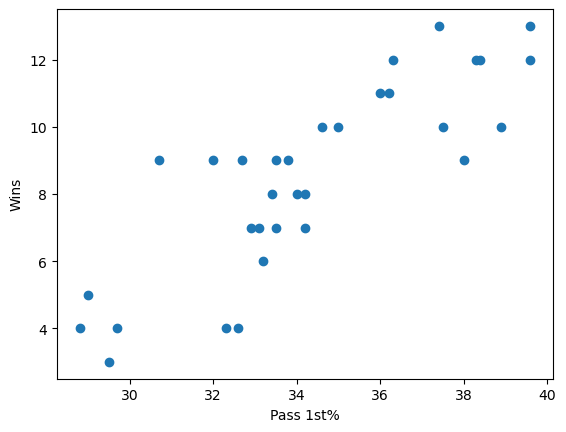

In [58]:
plt.scatter(df['Pass 1st%'], df['wins']) #Viewing one of the highly correlated variables to our total wins
plt.xlabel("Pass 1st%")
plt.ylabel("Wins")

In [59]:
df_np = df.to_numpy() # Converting our dataframe to a numpy array
print(df_np.shape) #Checking the shape (dimensions) of our data frame, to make sure it matches
x_reg_ind, y_reg_dep = df_np[:, 1:23], df_np[:, -1] #Splitting our data into the independent variables (x-var) and (y-var), this is so sklearn can run a multiple regression.
print(x_reg)
print(y_reg)

(32, 25)
[[8.6 4437 26 14 99.2 38.9 63 11 22 26 200 58.3 22 26 50 80 20 10 200
  58.3 130 26.0]
 [6.7 3635 16 20 75.5 33.2 40 7 14 16 180 54.2 14 16 32 75 36 15 180 54.2
  119 25.0]
 [8.7 4806 36 14 106.9 37.5 63 16 16 36 208 54.2 16 36 53 82 20 13 208
  54.2 96 22.0]
 [6.8 4450 36 16 91.3 36.0 51 8 20 36 236 56.9 20 36 57 103 22 11 236
  56.9 134 29.1]
 [7.1 3856 20 9 91.7 33.1 46 7 16 20 179 50.6 16 20 37 82 28 16 179 50.6
  123 27.0]
 [7.0 3619 21 14 84.6 34.0 47 9 20 21 177 55.3 20 21 42 83 29 12 177 55.3
  138 28.4]
 [7.4 5383 43 12 101.6 37.4 76 10 18 43 273 55.5 18 43 63 105 16 9 273
  55.5 106 27.5]
 [7.8 4619 27 11 100.6 36.2 62 11 23 27 214 51.6 23 27 51 100 29 17 214
  51.6 127 25.6]
 [7.4 5014 38 15 97.4 38.0 53 15 18 38 256 57.8 18 38 57 100 34 22 256
  57.8 112 26.5]
 [7.3 4937 37 13 98.1 39.6 58 11 16 37 267 59.6 16 37 55 107 15 10 267
  59.6 119 27.6]
 [6.9 3588 27 8 93.5 32.0 42 9 22 27 167 51.5 22 27 51 86 29 18 167 51.5
  154 30.9]
 [7.7 4963 40 11 104.8 38.3 63 9 15

In [60]:
from sklearn.linear_model import LinearRegression # Importing sklearn and LinearRegression
sklearn_model = LinearRegression().fit(x_reg_ind, y_reg_dep) # Here we are "training" the model with our Betas and Y outcomes.
sklearn_yhat = sklearn_model.predict(x_reg_ind) # We then take the "trained" model and use predict to take each beta, or x_reg_ind and make a prediction for our wins. AKA yhat or our estimator
sklearn_yhat # Here we are viewing what our estimates, or Yhat's are based upon our Betas and sklearn running the multivariate regression

array([10.83874654,  6.38034148,  9.5449117 , 10.92983941,  6.60236532,
        8.32699899, 12.73017606, 10.69679026, 10.31004724, 12.51239575,
        7.88457483, 11.68268841,  8.34720387,  8.80992287,  6.49471257,
        6.07160572,  4.12519867,  3.20622003,  3.89151481,  4.31875789,
       12.64371904,  4.43828259,  9.77349335,  9.01787483, 11.02232406,
        9.01330557,  8.55516302,  7.95384414,  8.86592125,  5.37772884,
       12.41250995,  9.22082093])

In [61]:
df['Predicted Wins'] = sklearn_yhat # Now we are adding our predicted wins or Yhat to our dataframe to compare with the actual outcome

In [62]:
df #Viewing our results, as we can see they are pretty close, but one of the limitations to this model is that a majority of
# these stats rely on individual players and these players move around the league to different teams between and during seasons.
# Which could potentially give us inaccurate results.

,Team,Pass Yds/Att,Pass Yds,Pass TD,Pass INT,Pass Rate,Pass 1st%,Pass 20+,Pass 40+,Rush TD,...,3rd Md,4th Att,4th Md,Rec 1st.1,Rec 1st%.1,Rush 1st,Rush 1st%.1,ACTIVE,wins,Predicted Wins
0,49ers,8.6,4437,26,14,99.2,38.9,63,11,22,...,80,20,10,200,58.3,130,26.0,138172427,10,10.838747
1,Bears,6.7,3635,16,20,75.5,33.2,40,7,14,...,75,36,15,180,54.2,119,25.0,128620134,6,6.380341
2,Bengals,8.7,4806,36,14,106.9,37.5,63,16,16,...,82,20,13,208,54.2,96,22.0,154339838,10,9.544912
3,Bills,6.8,4450,36,16,91.3,36.0,51,8,20,...,103,22,11,236,56.9,134,29.1,165572031,11,10.929839
4,Broncos,7.1,3856,20,9,91.7,33.1,46,7,16,...,82,28,16,179,50.6,123,27.0,107269390,7,6.602365
5,Browns,7.0,3619,21,14,84.6,34.0,47,9,20,...,83,29,12,177,55.3,138,28.4,126473899,8,8.326999
6,Buccaneers,7.4,5383,43,12,101.6,37.4,76,10,18,...,105,16,9,273,55.5,106,27.5,149094323,13,12.730176
7,Cardinals,7.8,4619,27,11,100.6,36.2,62,11,23,...,100,29,17,214,51.6,127,25.6,153976241,11,10.696790
8,Chargers,7.4,5014,38,15,97.4,38.0,53,15,18,...,100,34,22,256,57.8,112,26.5,159785845,9,10.310047
9,Chiefs,7.3,4937,37,13,98.1,39.6,58,11,16,...,107,15,10,267,59.6,119,27.6,160366274,12,12.512396
